# __Capstone Project 2: Exploratory Data Analysis__

### __Imports__

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import warnings
warnings.filterwarnings('ignore')

### __Load Data__

In [2]:
# Data can be found here https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
df = pd.read_csv('./data/data.csv', delimiter=';')

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In general, for true or false features, Yes = 1 and No = 0. Male = 1, Female = 0. Daytime/evening attendance: Daytime = 1, Evening = 0. Descriptions of features found at link above.

In [121]:
# Rename nacionality to nationality
df.rename({'Nacionality':'Nationality'}, axis=1, inplace=True)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [122]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [123]:
# Target data
df.Target

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object

In [124]:

print('Percentage of \'enrolled\' students: {:.2f}%'.format(float(df.Target[df.Target == 'Enrolled'].value_counts() / df.shape[0] * 100)))

Percentage of 'enrolled' students: 17.95%


It looks like we could easily remove the 'Enrolled' students from our dataset as they do not represent a large portion of the data and it might be more interesting to consider the cases of graduated or dropped out students only.

In [125]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=0)

,count,%
Marital status,0,0.0
Age at enrollment,0,0.0
Curricular units 1st sem (credited),0,0.0
Curricular units 1st sem (enrolled),0,0.0
Curricular units 1st sem (evaluations),0,0.0
Curricular units 1st sem (approved),0,0.0
Curricular units 1st sem (grade),0,0.0
Curricular units 1st sem (without evaluations),0,0.0
Curricular units 2nd sem (credited),0,0.0
Curricular units 2nd sem (enrolled),0,0.0


It looks like we are very fortunate to have a clean dataset with no missing values.

In [126]:
df.select_dtypes(include=['object']).columns

Index(['Target'], dtype='object')

The only columns with categorical data are 'Target', which will make classification easier.

In [127]:
df.Nationality.value_counts()

Nationality
1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103       3
21        2
101       2
62        2
25        2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: count, dtype: int64

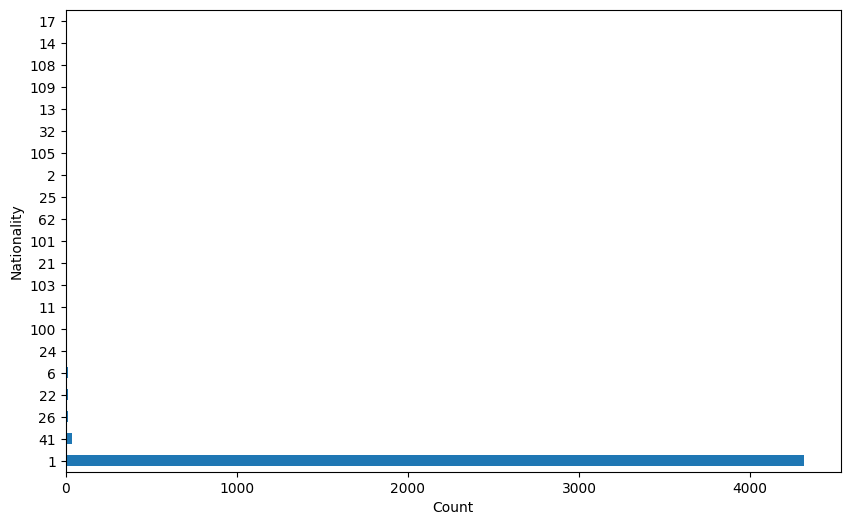

In [129]:
fig, ax = plt.subplots(figsize=(10, 6))
df.Nationality.value_counts().plot(kind='barh', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Nationality')
plt.show()

In [130]:
def txt_to_dict(file, dict):
    """Read text file and add key-value pairs to the dictionary."""
    with open(file, 'r') as f:
        for line in f:
            t = re.split('-|–', line, maxsplit=1) # some files have en dash (ASCI 8211) instead of normal hyphen (ASCII 45), so account for both. also some lines have multiple hyphens, only split first
            t[0] = t[0].strip()
            t[1] = t[1].strip()
            dict[t[0]] = t[1]

In [ ]:
# Create reference dictionaries for features using .txt files in data folder
for file in os.listdir('./data/'):
    if file.endswith('.txt'):
        dict_name = file.split('.')[0]
        globals()[dict_name] = {}
        txt_to_dict('./data/' + file, globals()[dict_name])

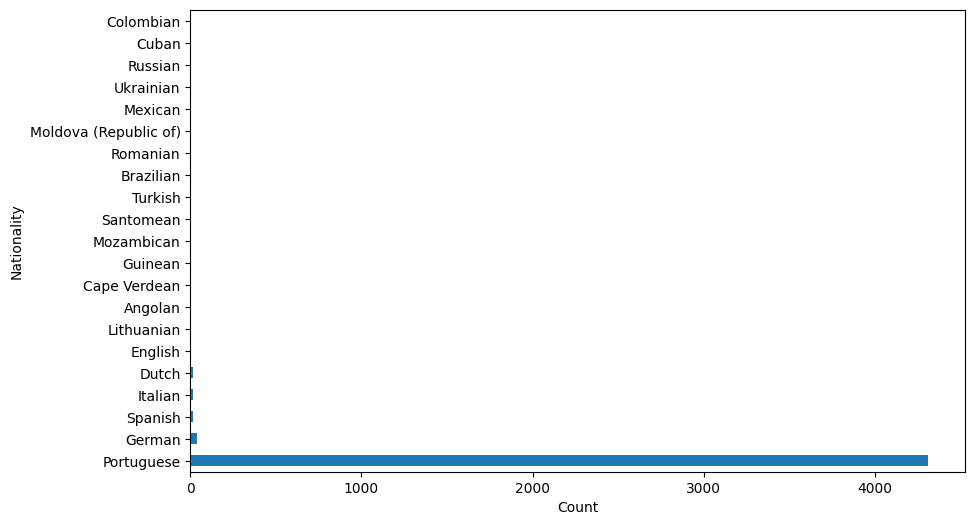

In [ ]:
# Replot previous figure with updated ylabels
fig, ax = plt.subplots(figsize=(10, 6))
df.Nationality.value_counts().plot(kind='barh', ax=ax)
ax.set_yticklabels(nationality.values())
ax.set_xlabel('Count')
ax.set_ylabel('Nationality')
plt.show()

In [136]:
# Double checking
print(df.Nationality.mode())

0    1
Name: Nationality, dtype: int64


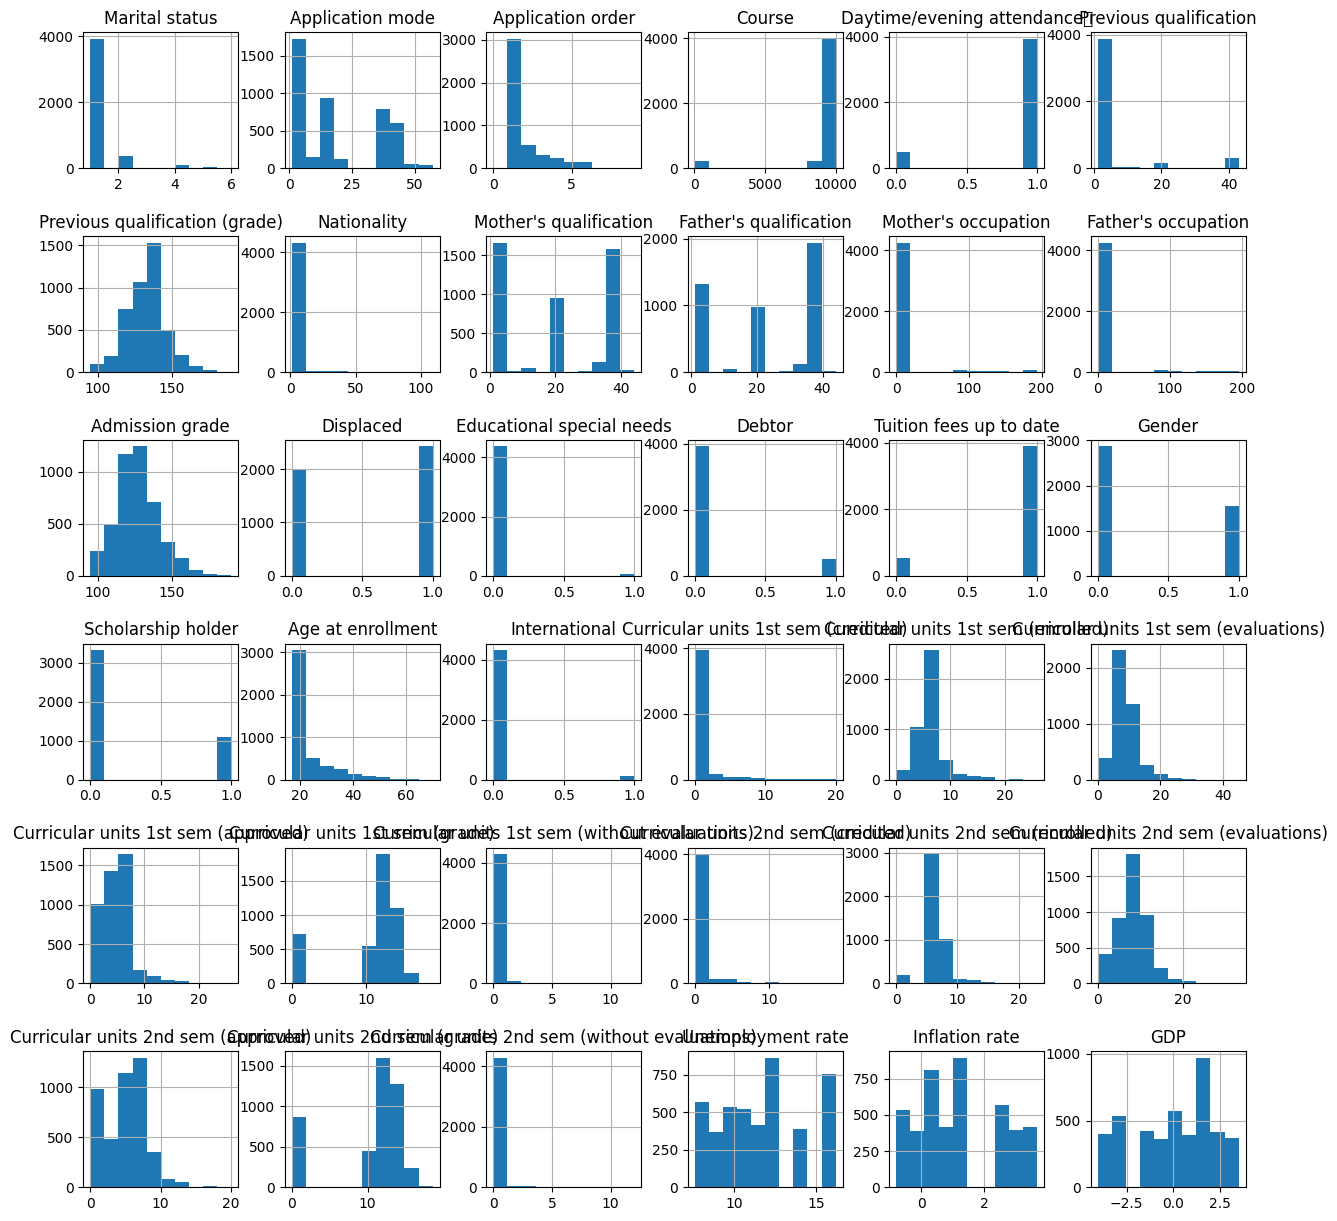

In [ ]:
df.hist(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)

Looking at the distributions above, I wonder about inflation rate, is it based on the student's nationality? In which case we should see more than 4000 with the same inflation rate, so maybe it refers to something else. Same with GDP, whose units make me wonder if it's not a log scale. In the next section I'll make a correlation plot, and from there I'll determine if I can excluse inflation rate and GDP, as they're features I don't fully understand. I also wonder about educational special needs, which could have a huge impact on student dropout rates, but it's a very skewed distribution.

In [144]:
print(df.GDP)
print(10**(df.GDP))

0       1.74
1       0.79
2       1.74
3      -3.12
4       0.79
        ... 
4419   -4.06
4420    2.02
4421    0.79
4422   -3.12
4423   -1.70
Name: GDP, Length: 4424, dtype: float64
0        54.954087
1         6.165950
2        54.954087
3         0.000759
4         6.165950
           ...    
4419      0.000087
4420    104.712855
4421      6.165950
4422      0.000759
4423      0.019953
Name: GDP, Length: 4424, dtype: float64


There are many categorical features, so melting the matrix will make it very long but it should be manageable. Luckily the dataset is very clean and doesn't really need to be cleaned further. I'd like to drop the inflation rate and GDP columns as soon as it makes sense to. 